# IS 362 - Week 8 Assignment

### Your task in this week’s assignment is to load a dataset, perform some minor cleanup and transformation tasks, then use exploratory data analysis to learn about the distribution of variables and the relationship between variables. Here is a link to the “Auto MPG” dataset in the UC Irvine data repository: https://archive.ics.uci.edu/ml/datasets/Auto+MPG.

In [1]:
# Import libraries

import numpy as num
import seaborn as sns
import matplotlib.pyplot as plot
import pandas as pan
from pandas import DataFrame, Series

%matplotlib inline

### 1. Load the data in the (yellow highlighted) Data Folder in the file auto-mpg.data into a pandas DataFrame.

In [2]:
# Load auto-mpg.data from the Machine Learning Repository

mpg = pan.read_fwf('https://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data', header=None)
mpg.head()

,0,1,2,3,4,5,6,7,8
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,"""chevrolet chevelle malibu"""
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,"""buick skylark 320"""
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,"""plymouth satellite"""
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,"""amc rebel sst"""
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,"""ford torino"""


### 2. Review the data and the provided data set description.
### 3. Use the attribute information provided in auto-mpg.names to name your pandas DataFrame columns.

In [3]:
# Rename the column headers using the names provided in the auto-mpg.names file

column_header = ['mpg', 'cylinders','displacement','horsepower','weight','acceleration','model year', 'origin', 'car name']
mpg.columns = column_header
mpg.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,"""chevrolet chevelle malibu"""
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,"""buick skylark 320"""
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,"""plymouth satellite"""
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,"""amc rebel sst"""
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,"""ford torino"""


### 4. Some of the horsepower data is marked as missing with a ‘?’. You need to replace this ‘?’ with a pandas-appropriate missing value, then convert the column to numeric.

In [4]:
# Check current data type of each column

mpg.dtypes

mpg             float64
cylinders         int64
displacement    float64
horsepower       object
weight          float64
acceleration    float64
model year        int64
origin            int64
car name         object
dtype: object

In [5]:
# Replace ? with NaN and convert horsepower column from object to numeric

mpg.horsepower = mpg.horsepower.replace('?', num.nan)
mpg.horsepower = pan.to_numeric(mpg.horsepower)
mpg.dtypes

mpg             float64
cylinders         int64
displacement    float64
horsepower      float64
weight          float64
acceleration    float64
model year        int64
origin            int64
car name         object
dtype: object

### 5. The origin column values are 1, 2, and 3. Convert these values respectively to ‘USA’, ‘Asia’, and ‘Europe’

In [6]:
# Convert numeric values in origin column to country names

origin = {1: 'USA', 2:'Asia', 3:'Europe'}
mpg.origin = mpg.origin.map(origin)
mpg.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130.0,3504.0,12.0,70,USA,"""chevrolet chevelle malibu"""
1,15.0,8,350.0,165.0,3693.0,11.5,70,USA,"""buick skylark 320"""
2,18.0,8,318.0,150.0,3436.0,11.0,70,USA,"""plymouth satellite"""
3,16.0,8,304.0,150.0,3433.0,12.0,70,USA,"""amc rebel sst"""
4,17.0,8,302.0,140.0,3449.0,10.5,70,USA,"""ford torino"""


### 6. Create a bar chart that shows the distribution for cylinders.

Text(0, 0.5, 'Count')

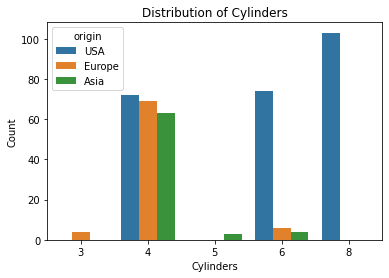

In [7]:
c = sns.countplot(x='cylinders', hue='origin', data=mpg)
plot.title('Distribution of Cylinders')
plot.xlabel('Cylinders')
plot.ylabel('Count')

### 7. Create a scatterplot that shows the relationship between horsepower and weight.

Text(0, 0.5, 'Weight')

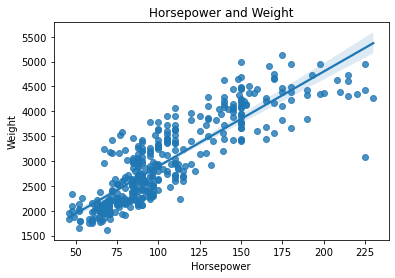

In [8]:
h = sns.regplot(x='horsepower', y='weight', data=mpg)
plot.title("Horsepower and Weight")
plot.xlabel('Horsepower')
plot.ylabel('Weight')

### 8. Ask, then answer (using matplotlib and seaborn graphics capabilities) an interesting question about the distribution of one of the variables, or the relationship between two (or more!) of the variables in the “Auto MPG” dataset.

### What is the relationship between horsepower and acceleration?

Text(0, 0.5, 'Acceleration')

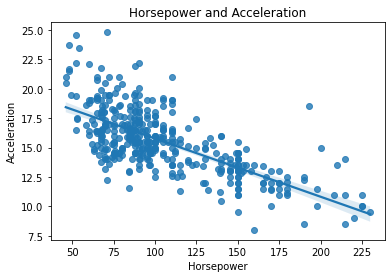

In [9]:
# Create a scatterplot to show the relationship between horsepower and acceleration

a = sns.regplot(x='horsepower', y='acceleration', data=mpg)
plot.title("Horsepower and Acceleration")
plot.xlabel('Horsepower')
plot.ylabel('Acceleration')

### Based on the data, as horsepower of a vehicle increases, its acceleration decreases.